<a href="https://colab.research.google.com/github/abhranil-datascience/DeepLearning/blob/ImageAnalytics/Day3_ResnetInbuiltModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
############################## Mount Drive ######################################## 
from google.colab import drive
drive.mount('/content/gdrive')

############################## Change Directory ###################################
import os
os.chdir('/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Dataset')

########## Suppress Warnings ############
import warnings
warnings.filterwarnings('ignore')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#################### Define Constant Folder Names and Get File Paths ###########################
DatasetDirectory='/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Dataset'
TrainingSet="training_set"
TestSet="test_set"
TrainingSetDirectory=DatasetDirectory+"/"+TrainingSet
TestSetDirectory=DatasetDirectory+"/"+TestSet
cat_directory="cats"
dog_directory="dogs"
TrainingSetCatDirectory=TrainingSetDirectory+"/"+cat_directory
TrainingSetDogDirectory=TrainingSetDirectory+"/"+dog_directory
FilePathsCatTrainingSet=[TrainingSetCatDirectory+"/"+fname for fname in os.listdir(TrainingSetCatDirectory) if '.jpg' in fname]
FilePathsDogTrainingSet=[TrainingSetDogDirectory+"/"+fname for fname in os.listdir(TrainingSetDogDirectory) if '.jpg' in fname]
TrainingSetFilePaths=FilePathsCatTrainingSet+FilePathsDogTrainingSet
import random
random.shuffle(TrainingSetFilePaths)
print("Number Of Training Set Cats: "+str(len(FilePathsCatTrainingSet))+ " || "+ 
      "Number Of Training Set Dogs: "+str(len(FilePathsDogTrainingSet))+ " || "+ 
      "Number of Training Set Images: "+str(len(TrainingSetFilePaths)))

Number Of Training Set Cats: 3928 || Number Of Training Set Dogs: 4000 || Number of Training Set Images: 7928


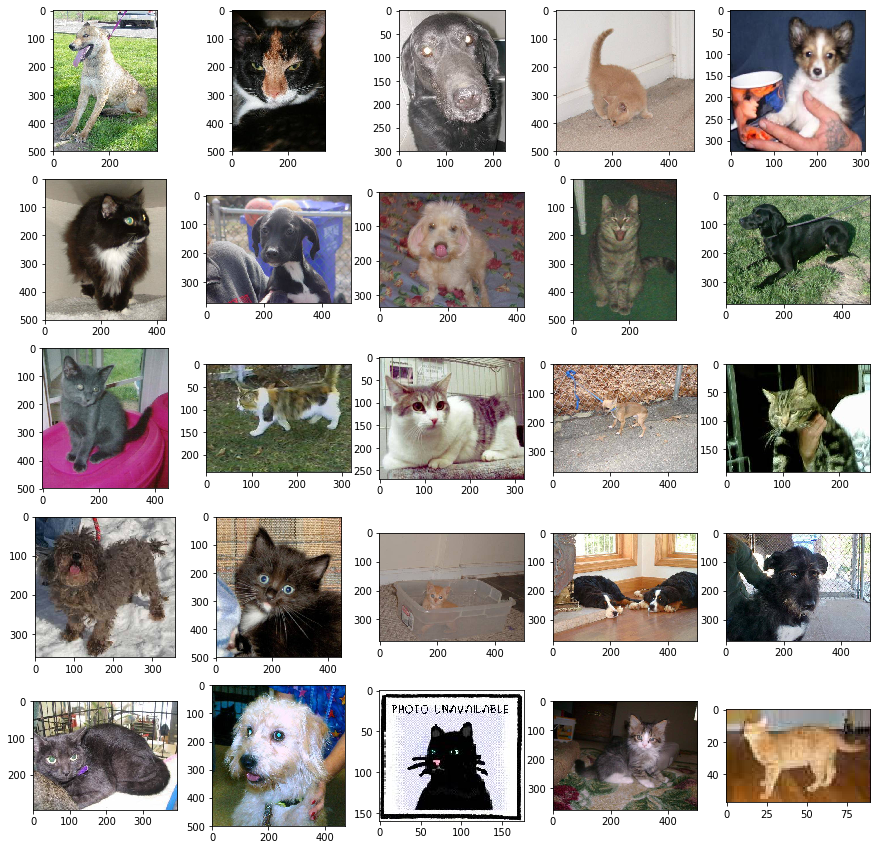

In [0]:
##################################### Visualize Data Set ##################################################
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
fig=plt.figure(figsize=(15,15))
columns = 5
rows = 5
for count in range(0,25):
  img=mpimg.imread(TrainingSetFilePaths[count])
  fig.add_subplot(rows, columns, count+1)
  imgplot = plt.imshow(img)
plt.show()

In [0]:
#################### Create Image Generator and Preprocess ################################################
from keras.preprocessing.image import ImageDataGenerator
train_image_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,vertical_flip=True)
test_image_generator=ImageDataGenerator(rescale=1./255)
training_set=train_image_generator.flow_from_directory(directory=TrainingSet,target_size=(224,224),classes=['cats','dogs'],class_mode='binary',batch_size=64, shuffle=True)
#training_set.class_indices ==> {'cats': 0, 'dogs': 1}
test_set=test_image_generator.flow_from_directory(directory=TestSetDirectory,target_size=(224,224),classes=['cats','dogs'],class_mode='binary',batch_size=64, shuffle=True)
#test_set.class_indices ==> {'cats': 0, 'dogs': 1}

Using TensorFlow backend.


Found 7928 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
#################################################### Create Callbacks ###########################################################
BestModel="/content/gdrive/My Drive/ImageAnalytics/Day3-ResnetFromKeras/BestModel/best_model_inbult_resnet.hdf5"
from keras.callbacks import ModelCheckpoint,EarlyStopping
save_best_model=ModelCheckpoint(filepath=BestModel,monitor='val_acc',save_best_only=True,mode='max',verbose=2)
early_stopping=EarlyStopping(monitor='val_acc',min_delta=0.003,patience=25,mode='max',restore_best_weights=True,verbose=2)

In [0]:
################################################## Import Reset50 Model ###################################################################
import warnings
warnings.filterwarnings('ignore')
from keras.applications import resnet50 as r50
base_model=r50.ResNet50(weights=None,include_top=False,input_shape=(224,224,3))
from keras.layers import Input,AveragePooling2D,Flatten,Dense
from keras.models import Model
X_Input=Input(shape=(224,224,3),name='main_input')
X=base_model(X_Input)
X=AveragePooling2D(pool_size=(7,7), padding='same')(X)
X=Flatten()(X)
output=Dense(units=1,activation='sigmoid')(X)
model=Model(inputs=X_Input,outputs=output)
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'],)
model.summary()










Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
main_input (InputLayer)      (None, 224, 224, 3)       0         
_________________________________________________________________
resnet50 (Model)             (None, 7, 7, 2048)        23587712  
_________________________________________________________________
average_pooling2d_1 (Average (None, 1, 1, 2048)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 2049      
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [0]:
########################### Fit Generator ###################################
model.fit_generator(generator=training_set,steps_per_epoch=7928/64,epochs=100,callbacks=[save_best_model,early_stopping],
                         validation_data=test_set,validation_steps=2000/64,shuffle=True,)

Epoch 1/100
124/123 [==============================] - 235s 2s/step - loss: 0.7656 - acc: 0.6088 - val_loss: 1.6127 - val_acc: 0.5490

Epoch 00001: val_acc improved from -inf to 0.54900, saving model to /content/gdrive/My Drive/ImageAnalytics/Day2-ResnetFromScratch/BestModel/best_model_inbult_resnet.hdf5
Epoch 2/100
124/123 [==============================] - 206s 2s/step - loss: 0.6234 - acc: 0.6660 - val_loss: 1.1856 - val_acc: 0.5550

Epoch 00002: val_acc improved from 0.54900 to 0.55500, saving model to /content/gdrive/My Drive/ImageAnalytics/Day2-ResnetFromScratch/BestModel/best_model_inbult_resnet.hdf5
Epoch 3/100
124/123 [==============================] - 206s 2s/step - loss: 0.5861 - acc: 0.6965 - val_loss: 0.6812 - val_acc: 0.6325

Epoch 00003: val_acc improved from 0.55500 to 0.63250, saving model to /content/gdrive/My Drive/ImageAnalytics/Day2-ResnetFromScratch/BestModel/best_model_inbult_resnet.hdf5
Epoch 4/100
124/123 [==============================] - 206s 2s/step - loss: 

In [0]:
################################## Test on New Images ########################################
from keras.models import load_model
best_model=load_model(BestModel)
PredictionDirectory='/content/gdrive/My Drive/ImageAnalytics/Day1-CNN/Test/Images'
import numpy as np
from skimage.io import imread
from skimage.transform import resize
for img in os.listdir(PredictionDirectory):
  img_path=PredictionDirectory+"/"+img
  curr_img=imread(img_path)
  curr_img_resized=resize(curr_img,output_shape=(224,224))
  curr_img=np.expand_dims(curr_img_resized,axis=0)
  curr_pred=best_model.predict(curr_img)
  if curr_pred > 0.5:
    print("Filename: "+img+" || Prediction: Dog")
  else:
    print("Filename: "+img+" || Prediction: Cat")

Filename: Picture1_cat.jpg || Prediction: Cat
Filename: Picture6_dog.jpg || Prediction: Dog
Filename: Picture2_cat.jpg || Prediction: Cat
Filename: Picture3_cat.jpg || Prediction: Cat
Filename: Picture4_dog.jpg || Prediction: Dog
Filename: Picture5_dog.jpg || Prediction: Dog
